In [ ]:
# from flair.models import TextClassifier
# from flair.data import Sentence
# classifier = TextClassifier.load('en-sentiment')
# sentence = Sentence('ache is bad!')
# classifier.predict(sentence)
# # print sentence with predicted labels
# print('Sentence above is: ', sentence.labels)

In [1]:
import pandas as pd
import numpy as np
import itertools
import codecs
import os

In [2]:
# get the current working directory
data_path = os.getcwd()+'/Datasets/'
# os.path.abspath(os.path.join(os.path.dirname( '__file__' ), '..', 'Datasets'))+'/'

# Although the dataset says csv, it is tab delimited. In addition to this, they have severe codels problems. 
# So best to parse throught codes first. 
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 2: invalid start byte

#open for reading with "universal" type set

import codecs

doc_d_t = codecs.open(data_path+'EUADR_Corpus_IBIgroup/'+'EUADR_drug_target'+'.csv','rU','UTF-8') 
EUADR_drug_target = pd.read_csv(doc_d_t, sep='\t', na_filter = False)
EUADR_drug_target['CLASS'] = 'drug_gene'

doc_t_d = codecs.open(data_path+'EUADR_Corpus_IBIgroup/'+'EUADR_target_disease'+'.csv','rU','UTF-8',errors='ignore') 
EUADR_target_disease = pd.read_csv(doc_t_d, sep='\t', na_filter = False)
EUADR_target_disease['CLASS'] = 'gene_disease'
       
doc_d_d = codecs.open(data_path+'EUADR_Corpus_IBIgroup/'+'EUADR_drug_disease'+'.csv','rU','UTF-8')                       
EUADR_drug_disease = pd.read_csv(doc_d_d, sep='\t', na_filter = False)
EUADR_drug_disease['CLASS'] = 'drug_disease'


EUADR_temp = EUADR_drug_target.append(EUADR_target_disease).append(EUADR_drug_disease)

EUADR_temp_1 = EUADR_temp[EUADR_temp['ASSOCIATION_TYPE'] == 'PA']
EUADR_temp_2 = EUADR_temp[EUADR_temp['ASSOCIATION_TYPE'] == 'NA']
EUADR_temp = EUADR_temp_1.append(EUADR_temp_2)
EUADR_temp.rename(columns={"SENTENCE": "text", "ASSOCIATION_TYPE": "label"}, inplace=True)

EUADR_temp.reset_index(inplace=True)

In [3]:
# Get GAD dataset

doc_t_d = codecs.open(data_path+'GAD_Corpus_IBIgroup/'+'GAD_Y_N'+'.csv','rU','UTF-8',errors='ignore') 
GAD_target_disease_Y_N = pd.read_csv(doc_t_d, sep='\t', na_filter = False)
GAD_target_disease_Y_N['CLASS'] = 'gene_disease'

doc_t_d = codecs.open(data_path+'GAD_Corpus_IBIgroup/'+'GAD_F'+'.csv','rU','UTF-8',errors='ignore') 
GAD_target_disease_F = pd.read_csv(doc_t_d, sep='\t', na_filter = False)
GAD_target_disease_F['CLASS'] = 'gene_disease'

GAD_temp = GAD_target_disease_Y_N



GAD_temp['GAD_ASSOC'] = GAD_temp['GAD_ASSOC'].apply(lambda x: x.replace('Y', 'PA').replace('N', 'NA').replace('F', 'FA'))

GAD_temp.rename(columns={"GAD_ASSOC": "label", "GAD_CONCLUSION": "text"}, inplace=True)
GAD_temp.reset_index(inplace=True)

In [4]:
df = EUADR_temp[['label','text']].append(GAD_temp[['label','text']])
df.reset_index(inplace=True)

In [5]:
df.drop("index", axis=1, inplace=True)


PA    2366
NA     994
Name: label, dtype: int64


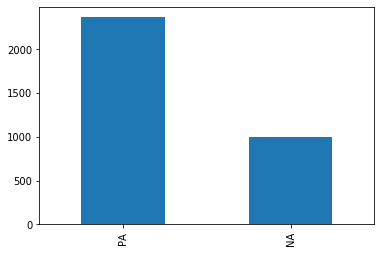

In [7]:
import matplotlib.pyplot as plt

labels_count = df['label'].value_counts()
labels_count.plot(kind="bar")
print(df['label'].value_counts())

In [14]:
from sklearn.model_selection import train_test_split
data_loc = data_path+'EU-ADR+GAD/'

data = df
# data['label'] = '__label__' + data['label'].astype(str)
# data.iloc[0:int(len(data)*0.8)].to_csv(data_loc+'train.csv', sep='\t', index = False, header = False)
# data.iloc[int(len(data)*0.8):int(len(data)*0.9)].to_csv(data_loc+'test.csv', sep='\t', index = False, header = False)
# data.iloc[int(len(data)*0.9):].to_csv(data_loc+'dev.csv', sep='\t', index = False, header = False);

df_train, df_valid = train_test_split(data, test_size=0.1, stratify=data['label'])
df_train, df_test = train_test_split(df_train, test_size=0.1, stratify=df_train['label'])

__label____label__PA    1916
__label____label__NA     805
Name: label, dtype: int64


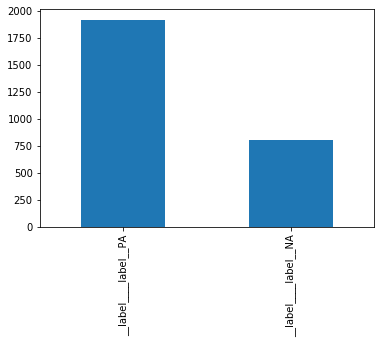

In [15]:
labels_count = df_train['label'].value_counts()
labels_count.plot(kind="bar")
print(df_train['label'].value_counts())

__label____label__PA    213
__label____label__NA     90
Name: label, dtype: int64


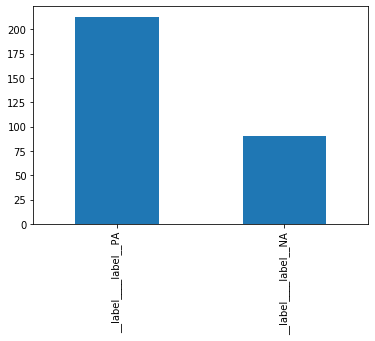

In [16]:
labels_count = df_test['label'].value_counts()
labels_count.plot(kind="bar")
print(df_test['label'].value_counts())

In [17]:
from flair.data_fetcher import NLPTaskDataFetcher
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings
from flair.embeddings import TokenEmbeddings, PooledFlairEmbeddings, StackedEmbeddings, CharacterEmbeddings
from flair.embeddings import BertEmbeddings
from flair.embeddings import ELMoEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from pathlib import Path
from typing import List


elmo_embeddings_pubmed = ELMoEmbeddings('pubmed')


In [18]:
corpus = NLPTaskDataFetcher.load_classification_corpus(Path(data_loc), test_file='test.csv', dev_file='dev.csv', train_file='train.csv')


2019-09-28 21:33:57,817 Reading data from /nfs/gns/literature/Santosh_Tirunagari/GitHub/Unsupervised-Protein-Genes-Diseases-Extraction/Datasets/EU-ADR+GAD
2019-09-28 21:33:57,821 Train: /nfs/gns/literature/Santosh_Tirunagari/GitHub/Unsupervised-Protein-Genes-Diseases-Extraction/Datasets/EU-ADR+GAD/train.csv
2019-09-28 21:33:57,822 Dev: /nfs/gns/literature/Santosh_Tirunagari/GitHub/Unsupervised-Protein-Genes-Diseases-Extraction/Datasets/EU-ADR+GAD/dev.csv
2019-09-28 21:33:57,824 Test: /nfs/gns/literature/Santosh_Tirunagari/GitHub/Unsupervised-Protein-Genes-Diseases-Extraction/Datasets/EU-ADR+GAD/test.csv


/homes/stirunag/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) load_classification_corpus. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  """Entry point for launching an IPython kernel.
/homes/stirunag/anaconda3/envs/pytorch/lib/python3.7/site-packages/flair/data_fetcher.py:447: DeprecationWarning: Call to deprecated function (or staticmethod) read_text_classification_file. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  max_tokens_per_doc=max_tokens_per_doc,
/homes/stirunag/anaconda3/envs/pytorch/lib/python3.7/site-packages/flair/data_fetcher.py:454: DeprecationWarning: Call to deprecated function (or staticmethod) read_text_classification_file. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  max_tokens_per_doc=max_tokens_per_doc,
/homes/stirunag/anaconda3/envs/pytorch/lib/python3.7/site-packages/flair/data_fetcher.py:463: Depre

In [19]:
# 3. make a list of word embeddings
word_embeddings = [WordEmbeddings('glove'),

                   # comment in flair embeddings for state-of-the-art results
                   FlairEmbeddings('news-forward'),
                   FlairEmbeddings('news-backward'),
                   CharacterEmbeddings(), 
                   PooledFlairEmbeddings('pubmed-backward', pooling='max'),
                   PooledFlairEmbeddings('pubmed-forward', pooling='max'),
                   # BertEmbedding('bert-large-cased'),
                   elmo_embeddings_pubmed
                   ]



In [20]:
# document_embeddings = DocumentRNNEmbeddings(word_embeddings, hidden_size=512, reproject_words=True, reproject_words_dimension=256)
document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
                                                                   rnn_type = "LSTM",
                                                                     hidden_size=512,
                                                                     reproject_words=True,
                                                                     reproject_words_dimension=256,
                                                                     )

In [21]:
classifier = TextClassifier(document_embeddings, label_dictionary=corpus.make_label_dictionary(), multi_label=False)



2019-09-28 21:34:23,494 Computing label dictionary. Progress:


100%|██████████| 2688/2688 [00:00<00:00, 378331.85it/s]

2019-09-28 21:34:23,522 [b'PA', b'NA']


In [22]:
trainer = ModelTrainer(classifier, corpus)


In [23]:
# 7. start the training
# trainer.train(data_loc, max_epochs=10)

result_loc = '../flair_models/text_classification/sentiment_model/v-01'
trainer.train(result_loc,
              learning_rate=0.15,
              mini_batch_size=128,
              anneal_factor=0.5,
              patience=5,
              max_epochs=150)

2019-09-28 21:35:03,116 ----------------------------------------------------------------------------------------------------
2019-09-28 21:35:03,117 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
      (list_embedding_3): CharacterEmbeddings(
        (char_embedding): Embedding(275, 25)
        (char_rnn): LSTM(25, 25, bidirectional=True)
 

2019-09-28 21:41:14,157 epoch 4 - iter 10/21 - loss 0.36152013 - samples/sec: 40.98
2019-09-28 21:41:22,107 epoch 4 - iter 12/21 - loss 0.34539078 - samples/sec: 36.38
2019-09-28 21:41:29,614 epoch 4 - iter 14/21 - loss 0.32952639 - samples/sec: 38.65
2019-09-28 21:41:37,574 epoch 4 - iter 16/21 - loss 0.31665685 - samples/sec: 38.62
2019-09-28 21:41:45,099 epoch 4 - iter 18/21 - loss 0.30948039 - samples/sec: 39.69
2019-09-28 21:41:54,667 epoch 4 - iter 20/21 - loss 0.29807547 - samples/sec: 30.93
2019-09-28 21:41:56,430 ----------------------------------------------------------------------------------------------------
2019-09-28 21:41:56,432 EPOCH 4 done: loss 0.2981 - lr 0.1500
2019-09-28 21:42:00,029 DEV : loss 0.2752223610877991 - score 0.9107
2019-09-28 21:42:00,125 BAD EPOCHS (no improvement): 0
2019-09-28 21:42:08,242 ----------------------------------------------------------------------------------------------------
train mode resetting embeddings
train mode resetting embeddi

2019-09-28 21:49:50,763 epoch 10 - iter 4/21 - loss 0.14970555 - samples/sec: 38.62
2019-09-28 21:49:58,887 epoch 10 - iter 6/21 - loss 0.15491280 - samples/sec: 37.80
2019-09-28 21:50:06,795 epoch 10 - iter 8/21 - loss 0.18208261 - samples/sec: 37.11
2019-09-28 21:50:14,391 epoch 10 - iter 10/21 - loss 0.18896858 - samples/sec: 39.01
2019-09-28 21:50:22,202 epoch 10 - iter 12/21 - loss 0.18492098 - samples/sec: 38.34
2019-09-28 21:50:29,778 epoch 10 - iter 14/21 - loss 0.18140521 - samples/sec: 38.19
2019-09-28 21:50:37,303 epoch 10 - iter 16/21 - loss 0.17648359 - samples/sec: 38.56
2019-09-28 21:50:44,983 epoch 10 - iter 18/21 - loss 0.17157128 - samples/sec: 38.25
2019-09-28 21:50:54,666 epoch 10 - iter 20/21 - loss 0.17562774 - samples/sec: 29.76
2019-09-28 21:50:55,812 ----------------------------------------------------------------------------------------------------
2019-09-28 21:50:55,815 EPOCH 10 done: loss 0.1756 - lr 0.1500
2019-09-28 21:50:59,358 DEV : loss 0.3089935183525

2019-09-28 21:58:22,881 BAD EPOCHS (no improvement): 5
2019-09-28 21:58:22,898 ----------------------------------------------------------------------------------------------------
train mode resetting embeddings
train mode resetting embeddings
2019-09-28 21:58:26,428 epoch 16 - iter 0/21 - loss 0.11420790 - samples/sec: 74.11
2019-09-28 21:58:35,283 epoch 16 - iter 2/21 - loss 0.12518657 - samples/sec: 33.29
2019-09-28 21:58:42,960 epoch 16 - iter 4/21 - loss 0.13514129 - samples/sec: 39.15
2019-09-28 21:58:51,154 epoch 16 - iter 6/21 - loss 0.12532671 - samples/sec: 37.96
2019-09-28 21:58:58,892 epoch 16 - iter 8/21 - loss 0.12376917 - samples/sec: 38.43
2019-09-28 21:59:06,585 epoch 16 - iter 10/21 - loss 0.12008436 - samples/sec: 38.49
2019-09-28 21:59:14,742 epoch 16 - iter 12/21 - loss 0.11431972 - samples/sec: 36.48
2019-09-28 21:59:23,075 epoch 16 - iter 14/21 - loss 0.11390505 - samples/sec: 36.46
2019-09-28 21:59:31,343 epoch 16 - iter 16/21 - loss 0.11573786 - samples/sec: 37

2019-09-28 22:07:16,526 epoch 21 - iter 18/21 - loss 0.10623289 - samples/sec: 39.27
2019-09-28 22:07:26,614 epoch 21 - iter 20/21 - loss 0.10416378 - samples/sec: 28.60
2019-09-28 22:07:27,943 ----------------------------------------------------------------------------------------------------
2019-09-28 22:07:27,946 EPOCH 21 done: loss 0.1042 - lr 0.0375
2019-09-28 22:07:31,573 DEV : loss 0.32584667205810547 - score 0.8929
2019-09-28 22:07:31,671 BAD EPOCHS (no improvement): 5
2019-09-28 22:07:31,680 ----------------------------------------------------------------------------------------------------
train mode resetting embeddings
train mode resetting embeddings
2019-09-28 22:07:35,404 epoch 22 - iter 0/21 - loss 0.09060971 - samples/sec: 70.16
2019-09-28 22:07:43,403 epoch 22 - iter 2/21 - loss 0.09630016 - samples/sec: 37.86
2019-09-28 22:07:51,343 epoch 22 - iter 4/21 - loss 0.08718702 - samples/sec: 37.66
2019-09-28 22:07:59,375 epoch 22 - iter 6/21 - loss 0.09808829 - samples/sec

2019-09-28 22:16:03,351 epoch 27 - iter 8/21 - loss 0.09165654 - samples/sec: 36.94
2019-09-28 22:16:10,816 epoch 27 - iter 10/21 - loss 0.09250418 - samples/sec: 40.38
2019-09-28 22:16:18,887 epoch 27 - iter 12/21 - loss 0.09062673 - samples/sec: 37.07
2019-09-28 22:16:26,835 epoch 27 - iter 14/21 - loss 0.09198049 - samples/sec: 37.10
2019-09-28 22:16:35,017 epoch 27 - iter 16/21 - loss 0.09229710 - samples/sec: 36.80
2019-09-28 22:16:42,673 epoch 27 - iter 18/21 - loss 0.09528053 - samples/sec: 40.00
2019-09-28 22:16:52,326 epoch 27 - iter 20/21 - loss 0.09179705 - samples/sec: 29.97
2019-09-28 22:16:54,230 ----------------------------------------------------------------------------------------------------
2019-09-28 22:16:54,232 EPOCH 27 done: loss 0.0918 - lr 0.0187
2019-09-28 22:16:57,852 DEV : loss 0.33554190397262573 - score 0.8958
2019-09-28 22:16:57,960 BAD EPOCHS (no improvement): 5
2019-09-28 22:16:57,964 ---------------------------------------------------------------------

train mode resetting embeddings
train mode resetting embeddings
2019-09-28 22:24:38,962 epoch 33 - iter 0/21 - loss 0.04143235 - samples/sec: 72.37
2019-09-28 22:24:47,598 epoch 33 - iter 2/21 - loss 0.07671157 - samples/sec: 36.37
2019-09-28 22:24:55,614 epoch 33 - iter 4/21 - loss 0.09315761 - samples/sec: 38.59
2019-09-28 22:25:05,210 epoch 33 - iter 6/21 - loss 0.09862818 - samples/sec: 33.86
2019-09-28 22:25:12,983 epoch 33 - iter 8/21 - loss 0.10179617 - samples/sec: 40.09
2019-09-28 22:25:20,793 epoch 33 - iter 10/21 - loss 0.10161849 - samples/sec: 38.87
2019-09-28 22:25:28,864 epoch 33 - iter 12/21 - loss 0.10230771 - samples/sec: 37.25
2019-09-28 22:25:36,956 epoch 33 - iter 14/21 - loss 0.09951819 - samples/sec: 36.98
2019-09-28 22:25:45,210 epoch 33 - iter 16/21 - loss 0.09734808 - samples/sec: 36.16
2019-09-28 22:25:53,109 epoch 33 - iter 18/21 - loss 0.09511283 - samples/sec: 37.89
2019-09-28 22:26:03,042 epoch 33 - iter 20/21 - loss 0.09395443 - samples/sec: 29.23
2019-0

2019-09-28 22:33:39,429 ----------------------------------------------------------------------------------------------------
2019-09-28 22:33:39,432 EPOCH 38 done: loss 0.0890 - lr 0.0047
2019-09-28 22:33:43,057 DEV : loss 0.3441351652145386 - score 0.8958
2019-09-28 22:33:43,156 BAD EPOCHS (no improvement): 4
2019-09-28 22:33:43,160 ----------------------------------------------------------------------------------------------------
train mode resetting embeddings
train mode resetting embeddings
2019-09-28 22:33:46,937 epoch 39 - iter 0/21 - loss 0.09550243 - samples/sec: 69.03
2019-09-28 22:33:54,968 epoch 39 - iter 2/21 - loss 0.07117740 - samples/sec: 36.49
2019-09-28 22:34:02,607 epoch 39 - iter 4/21 - loss 0.08279985 - samples/sec: 38.71
2019-09-28 22:34:10,262 epoch 39 - iter 6/21 - loss 0.07861821 - samples/sec: 38.28
2019-09-28 22:34:17,991 epoch 39 - iter 8/21 - loss 0.08720178 - samples/sec: 37.83
2019-09-28 22:34:25,644 epoch 39 - iter 10/21 - loss 0.08370832 - samples/sec: 

2019-09-28 22:42:01,236 epoch 44 - iter 12/21 - loss 0.09241510 - samples/sec: 39.47
2019-09-28 22:42:08,764 epoch 44 - iter 14/21 - loss 0.08732896 - samples/sec: 38.83
2019-09-28 22:42:16,819 epoch 44 - iter 16/21 - loss 0.08694263 - samples/sec: 37.30
2019-09-28 22:42:24,638 epoch 44 - iter 18/21 - loss 0.08876440 - samples/sec: 37.76
2019-09-28 22:42:34,395 epoch 44 - iter 20/21 - loss 0.08663483 - samples/sec: 29.58
2019-09-28 22:42:35,871 ----------------------------------------------------------------------------------------------------
2019-09-28 22:42:35,873 EPOCH 44 done: loss 0.0866 - lr 0.0023
2019-09-28 22:42:39,479 DEV : loss 0.3454747796058655 - score 0.8958
2019-09-28 22:42:39,576 BAD EPOCHS (no improvement): 4
2019-09-28 22:42:39,587 ----------------------------------------------------------------------------------------------------
train mode resetting embeddings
train mode resetting embeddings
2019-09-28 22:42:43,032 epoch 45 - iter 0/21 - loss 0.12307867 - samples/s

2019-09-28 22:50:21,821 epoch 50 - iter 2/21 - loss 0.08755471 - samples/sec: 32.68
2019-09-28 22:50:29,879 epoch 50 - iter 4/21 - loss 0.07788548 - samples/sec: 37.62
2019-09-28 22:50:37,473 epoch 50 - iter 6/21 - loss 0.07655522 - samples/sec: 38.66
2019-09-28 22:50:45,594 epoch 50 - iter 8/21 - loss 0.09196264 - samples/sec: 37.39
2019-09-28 22:50:53,472 epoch 50 - iter 10/21 - loss 0.08647214 - samples/sec: 37.40
2019-09-28 22:51:01,340 epoch 50 - iter 12/21 - loss 0.08901055 - samples/sec: 38.65
2019-09-28 22:51:08,875 epoch 50 - iter 14/21 - loss 0.08948428 - samples/sec: 39.52
2019-09-28 22:51:16,956 epoch 50 - iter 16/21 - loss 0.08895830 - samples/sec: 36.87
2019-09-28 22:51:24,616 epoch 50 - iter 18/21 - loss 0.08834581 - samples/sec: 38.56
2019-09-28 22:51:34,961 epoch 50 - iter 20/21 - loss 0.08643530 - samples/sec: 27.76
2019-09-28 22:51:36,293 ----------------------------------------------------------------------------------------------------
2019-09-28 22:51:36,296 EPOCH

2019-09-28 22:59:13,023 DEV : loss 0.3474363088607788 - score 0.8958
2019-09-28 22:59:13,121 BAD EPOCHS (no improvement): 3
2019-09-28 22:59:13,125 ----------------------------------------------------------------------------------------------------
train mode resetting embeddings
train mode resetting embeddings
2019-09-28 22:59:16,796 epoch 56 - iter 0/21 - loss 0.10031037 - samples/sec: 71.04
2019-09-28 22:59:24,818 epoch 56 - iter 2/21 - loss 0.11466114 - samples/sec: 36.86
2019-09-28 22:59:32,599 epoch 56 - iter 4/21 - loss 0.09111440 - samples/sec: 38.33
2019-09-28 22:59:40,552 epoch 56 - iter 6/21 - loss 0.07973562 - samples/sec: 38.05
2019-09-28 22:59:51,315 epoch 56 - iter 8/21 - loss 0.08010405 - samples/sec: 41.10
2019-09-28 22:59:59,594 epoch 56 - iter 10/21 - loss 0.08218904 - samples/sec: 35.12
2019-09-28 23:00:07,220 epoch 56 - iter 12/21 - loss 0.07807656 - samples/sec: 38.55
2019-09-28 23:00:15,739 epoch 56 - iter 14/21 - loss 0.08171295 - samples/sec: 36.25
2019-09-28 2

2019-09-28 23:08:04,341 epoch 61 - iter 16/21 - loss 0.08979424 - samples/sec: 34.20
2019-09-28 23:08:12,774 epoch 61 - iter 18/21 - loss 0.08555715 - samples/sec: 37.21
2019-09-28 23:08:22,681 epoch 61 - iter 20/21 - loss 0.08377398 - samples/sec: 29.48
2019-09-28 23:08:24,152 ----------------------------------------------------------------------------------------------------
2019-09-28 23:08:24,154 EPOCH 61 done: loss 0.0838 - lr 0.0003
2019-09-28 23:08:27,887 DEV : loss 0.3475305736064911 - score 0.8958
2019-09-28 23:08:27,985 BAD EPOCHS (no improvement): 3
2019-09-28 23:08:27,990 ----------------------------------------------------------------------------------------------------
train mode resetting embeddings
train mode resetting embeddings
2019-09-28 23:08:31,436 epoch 62 - iter 0/21 - loss 0.05325048 - samples/sec: 75.80
2019-09-28 23:08:39,848 epoch 62 - iter 2/21 - loss 0.09525301 - samples/sec: 36.67
2019-09-28 23:08:47,829 epoch 62 - iter 4/21 - loss 0.08963828 - samples/sec

2019-09-28 23:16:33,600 epoch 67 - iter 6/21 - loss 0.08568555 - samples/sec: 37.14
2019-09-28 23:16:41,504 epoch 67 - iter 8/21 - loss 0.08437267 - samples/sec: 38.51
2019-09-28 23:16:49,264 epoch 67 - iter 10/21 - loss 0.08382050 - samples/sec: 38.71
2019-09-28 23:16:57,561 epoch 67 - iter 12/21 - loss 0.08779175 - samples/sec: 37.41
2019-09-28 23:17:06,102 epoch 67 - iter 14/21 - loss 0.08325941 - samples/sec: 38.50
2019-09-28 23:17:14,496 epoch 67 - iter 16/21 - loss 0.07983494 - samples/sec: 37.64
2019-09-28 23:17:22,757 epoch 67 - iter 18/21 - loss 0.07830761 - samples/sec: 36.16
2019-09-28 23:17:32,549 epoch 67 - iter 20/21 - loss 0.08292457 - samples/sec: 29.80
2019-09-28 23:17:33,837 ----------------------------------------------------------------------------------------------------
2019-09-28 23:17:33,839 EPOCH 67 done: loss 0.0829 - lr 0.0001
2019-09-28 23:17:37,514 DEV : loss 0.3475216329097748 - score 0.8958
2019-09-28 23:17:37,613 BAD EPOCHS (no improvement): 3
2019-09-28

{'test_score': 0.869,
 'dev_score_history': [0.6607,
  0.7619,
  0.631,
  0.9107,
  0.9018,
  0.8839,
  0.8899,
  0.8988,
  0.9018,
  0.9018,
  0.8988,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8929,
  0.8988,
  0.8988,
  0.8988,
  0.8988,
  0.8929,
  0.8988,
  0.8988,
  0.8988,
  0.8988,
  0.8988,
  0.8958,
  0.8988,
  0.8988,
  0.8958,
  0.8988,
  0.8958,
  0.8958,
  0.8988,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958,
  0.8958],
 'train_loss_history': [0.6755967480795724,
  0.5372549848897117,
  0.38758914385523113,
  0.2980754737343107,
  0.26426352844351814,
  0.2746825927779788,
  0.22775339867387498,
  0.18689725796381632,
  0.22319525764102027,
  0.1756277403661183,
  0.148645

In [24]:
import torch
torch.cuda.is_available()

True

In [25]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load(result_loc+'/best-model.pt')


2019-09-30 09:40:47,441 loading file ../flair_models/text_classification/sentiment_model/v-01/best-model.pt


In [26]:
sentence = Sentence('The FCRL3 polymorphisms associated with rheumatoid arthritis in a Japanese population are not associated per se with rheumatoid arthritis in a Spanish population.')
# sentence = Sentence('We obtained evidence from two Caucasian study populations that the His298-allele of PTGES2 Arg298His confers to reduced risk of type 2 diabetes.')
# sentence = Sentence('it does not seem that variants in MnSOD, CAT, or GPX1 have an influence on prostate cancer risk in this cohort of men who were smokers or exposed to asbestos, although it is possible that cumulative defects in protection from oxidative stress may result in increased risk of the disease.')
classifier.predict(sentence)
print(sentence.labels)

[NA (0.9876202940940857)]


In [ ]:
# from tqdm import tqdm   
# with open(complete_file_path) as test:
#     print(complete_file_path)
# predicted_label = []
# for index, rows in tqdm(df.iterrows(), total=df.shape[0]):
#     if rows['label'] == 'NA':
#        ground_truth.append('Negative')
#     else:
#        ground_truth.append('Positive')
#     sentence = Sentence(rows['text'])
#     classifier.predict(sentence)
#     predicted_label.append(sentence.labels[0].value)
    
    